# Predicting car prices

In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

As a conclusion **multivariate k-nearest neighbors regression model using `horsepower`, `engine size`, and `city-mpg` columns with k = 3 turned out to be the most accurate and reliable one.**

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

pd.options.display.max_columns = 99

## Discovering the data

In [2]:
# Rename the columns
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Summarising the dataset using Pandas Profiling
profile = ProfileReport(cars, title="Pandas Profiling Report")

In [5]:
# Take a look at the summary (comment it to avoid long report generation for the consequent kernel runs)
#profile 

## Cleaning the data

We need to get rid of missing data in order to let our machine learning algorithm work.

In [6]:
cars['normalized-losses'].value_counts().head()

?      41
161    11
91      8
150     7
134     6
Name: normalized-losses, dtype: int64

In [7]:
cars.replace('?', np.nan, inplace=True)
cars['normalized-losses'].value_counts(dropna=False).head()

NaN    41
161    11
91      8
150     7
104     6
Name: normalized-losses, dtype: int64

In [8]:
# Explore columns with nulled normalized losses
cars[cars['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


We cannot simply drop all these rows since we'll lose a lot of valuable information for our algorithm's training. Let's first of all convert some `object` column to `numeric` ones and then fill the missing values.

In [9]:
cars['bore'] = cars['bore'].astype(float)
cars['stroke'] = cars['stroke'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(float)
cars['peak-rpm'] = pd.to_numeric(cars['peak-rpm'], errors='coerce', downcast='integer')
cars['normalized-losses'] = pd.to_numeric(cars['normalized-losses'], errors='coerce', downcast='integer')
cars['price'] = cars['price'].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

It is better to drop rows with missing values in `price` column since there are just 2 of them and averaging missing value can lead to the biased results of the prediction. Regarding `num-of-doors` column we can't put an average value also, since all the values have to be integers either 2 or 4 and average will be some float value in between them.

In [11]:
# Delete rows with missing values
cars.dropna(subset=['price', 'num-of-doors'], inplace=True)

# Fill missing values with average value in the remaining columns
cars.fillna(cars.mean(), inplace=True)
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now, we need to convert `num-of-doors` and `num-of-cylinders` columns to numeric type. The best way would be to define dictionaries and map them on these columns.

In [12]:
cars['num-of-doors'].value_counts(dropna=False)

four    113
two      86
Name: num-of-doors, dtype: int64

In [13]:
cars['num-of-cylinders'].value_counts(dropna=False)

four      155
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [14]:
# Convert categorical columns into numeric
mapping_dict_doors = {
    'two': '2',
    'four': '4'
}
mapping_dict_cyl = {
    'two': '2',
    'three': '3',
    'four': '4',
    'five': '5',
    'six': '6',
    'eight': '8',
    'twelve': '12',
}
cars['num-of-doors'] = cars['num-of-doors'].map(mapping_dict_doors).astype(int)
cars['num-of-cylinders'] = cars['num-of-cylinders'].map(mapping_dict_cyl).astype(int)

In [15]:
cars['num-of-doors'].value_counts(dropna=False)

4    113
2     86
Name: num-of-doors, dtype: int64

In [16]:
cars['num-of-cylinders'].value_counts(dropna=False)

4     155
6      24
5      10
2       4
8       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [17]:
# Create a dataset with only numeric columns from cars
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.840491,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Feature engineering

We have to normalize all columnns to range from 0 to 1 except the target column. We need to do this since k-nearest neighbors algorithm is sensitive to the absolute distance during the prediction process. We will not use MinMaxScaler from sklearn.preprocessing for this particular task since we need pandas dataframe in return and not just numpy array.

In [18]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = cars_numeric['price']
cars_numeric = (cars_numeric - cars_numeric.min())/(cars_numeric.max() - cars_numeric.min())
cars_numeric['price'] = price_col
cars_numeric.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.297594,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.297594,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.297594,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate model

Now, let's define functions forthe prediction of the car's price. We'll start with univariate model and k parameter fixed to 5.

In [19]:
from sklearn.model_selection import train_test_split

def knn_train_test(training_col, target_col, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Divide the dataset
    train, test = train_test_split(df, test_size=0.25, random_state=1)
    
    # Fit the model and predict the outcomes  
    knn.fit(train[[training_col]], train[target_col])
    predictions = knn.predict(test[[training_col]])
    
    # Accuracy
    mse = mean_squared_error(test[target_col], predictions)
    return np.sqrt(mse)

train_cols = cars_numeric.columns.drop('price')
for column in train_cols:
    print(f" The RMSE for {column} column is {knn_train_test(column, 'price', cars_numeric):.2f}")

 The RMSE for symboling column is 8634.29
 The RMSE for normalized-losses column is 6407.50
 The RMSE for num-of-doors column is 9002.39
 The RMSE for wheel-base column is 6063.64
 The RMSE for length column is 5249.87
 The RMSE for width column is 5107.75
 The RMSE for height column is 8416.81
 The RMSE for curb-weight column is 4815.19
 The RMSE for num-of-cylinders column is 4551.73
 The RMSE for engine-size column is 2488.25
 The RMSE for bore column is 6997.09
 The RMSE for stroke column is 7614.35
 The RMSE for compression-rate column is 6148.07
 The RMSE for horsepower column is 1938.98
 The RMSE for peak-rpm column is 7433.45
 The RMSE for city-mpg column is 4119.17
 The RMSE for highway-mpg column is 4157.67


In [20]:
# Sort columns in ascending order
rmse_results = {}
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    rmse_results[col] = rmse_val
        
rmse_results
rmses = pd.Series(rmse_results)  
rmses.sort_values()

horsepower           1938.978302
engine-size          2488.250189
city-mpg             4119.171196
highway-mpg          4157.670044
num-of-cylinders     4551.734937
curb-weight          4815.191305
width                5107.750375
length               5249.874563
wheel-base           6063.636722
compression-rate     6148.069944
normalized-losses    6407.498964
bore                 6997.094822
peak-rpm             7433.452480
stroke               7614.348266
height               8416.809826
symboling            8634.293963
num-of-doors         9002.391392
dtype: float64

Now, let's see rmse score for each parameter varying k value. We need to modify our function first.

In [21]:
# Write a function to take different k values
def knn_train_test_k(training_col, target_col, df):
    # Divide the dataset
    train, test = train_test_split(df, test_size=0.25, random_state=1)
    
    k_values = [1, 3, 5, 7, 9]
    k_rmse = {}
    
    # Fir the model and predict the outcomes
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[training_col]], train[target_col])
        predictions = knn.predict(test[[training_col]])
    
        # Accuracy
        mse = mean_squared_error(test[target_col], predictions)
        k_rmse[k] = np.sqrt(mse)
    return k_rmse

rmse_results = {}
for col in train_cols:
    rmse_val = knn_train_test_k(col, 'price', cars_numeric)
    rmse_results[col] = rmse_val
        
rmse_results

{'symboling': {1: 8288.25263369789,
  3: 8305.934701163982,
  5: 8634.293962519461,
  7: 8371.858930844402,
  9: 8435.082080085398},
 'normalized-losses': {1: 8554.284874844887,
  3: 5985.453731060551,
  5: 6407.4989636831,
  7: 6200.620020972886,
  9: 6853.3640433632445},
 'num-of-doors': {1: 11837.155974303963,
  3: 10792.378695686653,
  5: 9002.391391891379,
  7: 8473.477248160996,
  9: 9060.208311834069},
 'wheel-base': {1: 2918.6992171171046,
  3: 4651.839485622865,
  5: 6063.6367219021295,
  7: 6213.650480209205,
  9: 6348.772902413486},
 'length': {1: 5187.118271256209,
  3: 4783.065690770118,
  5: 5249.874563377681,
  7: 5593.228506955567,
  9: 5903.658388022561},
 'width': {1: 4242.631461722783,
  3: 4604.697718634742,
  5: 5107.750374793192,
  7: 5351.0667742850255,
  9: 5570.581466225214},
 'height': {1: 11444.853880238052,
  3: 8446.713568272837,
  5: 8416.809826341569,
  7: 8779.818509815914,
  9: 8758.916856214248},
 'curb-weight': {1: 5992.175453038737,
  3: 5053.4419286

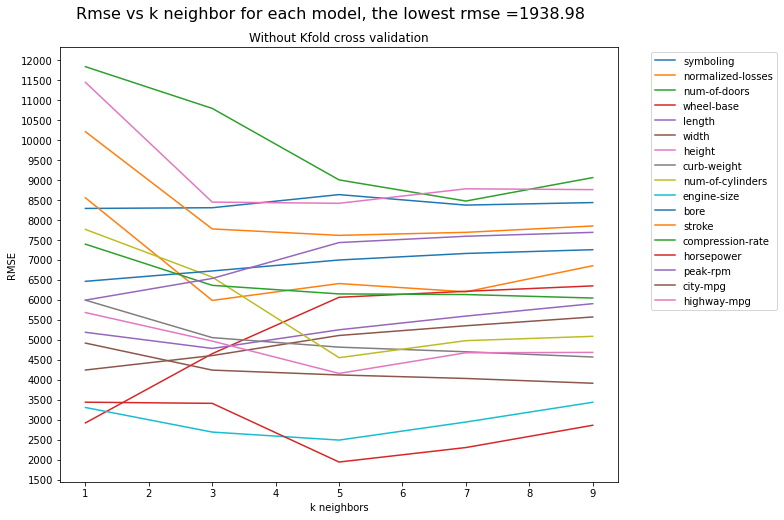

In [22]:
# Define the function for plotting this type of graphs
def plot_k_graph(dictionary, Multivar=False, kfold=False):
    min_val = []
    plt.figure(figsize=(10, 8))
    if Multivar == False:
        for key in dictionary:
            plt.plot(dictionary[key].keys(), dictionary[key].values(), label=key)
            min_val.append(min(dictionary[key].values()))
        plt.legend(bbox_to_anchor=(1.05, 1)) # Width and heigth relative to the canvas
        plt.xticks(np.arange(1, 10))
        plt.yticks(np.arange(1500, 12001, 500))
    else:
        for key in dictionary:
            plt.plot(dictionary[key].keys(), dictionary[key].values(), label=(f"{key} best features"))
            min_val.append(min(dictionary[key].values()))
        plt.legend(loc='lower right')
        plt.xticks(np.arange(1, 26))
        plt.yticks(np.arange(1500, 5001, 500))
    plt.xlabel('k neighbors')
    plt.ylabel('RMSE')
    plt.suptitle(f'Rmse vs k neighbor for each model, the lowest rmse ={np.min(min_val):.2f}', fontsize = 16, y=0.95)
    if kfold == True:
        plt.title('WIth Kfold cross validation')
    else:
        plt.title('Without Kfold cross validation')
    plt.show()

    
plot_k_graph(rmse_results)    

## Multivariate model

Now, let's test multivariate model and see the difference in the best rmse score.

In [23]:
# Write a function for multivariate model
def knn_train_test_multi(training_cols, target_col, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Divide the dataset
    train, test = train_test_split(df, test_size=0.25, random_state=1)
    
    # Fir the model and predict the outcomes  
    knn.fit(train[training_cols], train[target_col]) # Erase one pair of square brackets to accept multiple columns
    predictions = knn.predict(test[training_cols])
    
    # Accuracy
    mse = mean_squared_error(test[target_col], predictions)
    return np.sqrt(mse)

for features in range(2,6):
    print(f"The RMSE for {features} best features is {knn_train_test_multi(rmses.sort_values().index[:features], 'price', cars_numeric):.2f}")

The RMSE for 2 best features is 3200.47
The RMSE for 3 best features is 2580.70
The RMSE for 4 best features is 2739.47
The RMSE for 5 best features is 3279.35


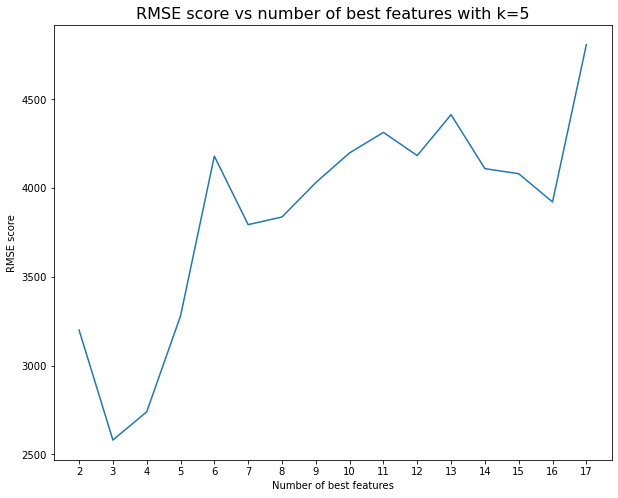

In [24]:
# Plot the results
plt.figure(figsize=(10, 8))
x = range(2, rmses.shape[0]+1)
y = []
for features in x:
    y.append(knn_train_test_multi(rmses.sort_values().index[:features], 'price', cars_numeric))
plt.plot(x,y)
plt.xlabel('Number of best features')
plt.ylabel('RMSE score')
plt.title('RMSE score vs number of best features with k=5', fontsize=16)
plt.xticks(np.arange(2, rmses.shape[0]+1))
plt.show()

Now, let's choose the best three multivariate models and perform hyperparameter tuning with them, varying k value from 1 to 25.

In [25]:
models = pd.Series(y,x)
top_three_models = models.sort_values().head(3)
top_three_models

3    2580.704611
4    2739.472916
2    3200.467446
dtype: float64

In [26]:
# Write a function for various k for multivariate model
def knn_train_test_multi_k(training_col, target_col, df):
    # Divide the dataset
    train, test = train_test_split(df, test_size=0.25, random_state=1)
    
    k_values = np.arange(1, 26)
    k_rmse = {}
    
    # Fit the model and predict the outcomes
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[training_col], train[target_col])
        predictions = knn.predict(test[training_col])
    
        # Accuracy
        mse = mean_squared_error(test[target_col], predictions)
        k_rmse[k] = np.sqrt(mse)
    return k_rmse

rmse_results_multi = {}
for n_cols in top_three_models.index:
    rmse_val = knn_train_test_multi_k(rmses.sort_values().index[:n_cols], 'price', cars_numeric)
    rmse_results_multi[n_cols] = rmse_val
        
rmse_results_multi

{3: {1: 2366.837801793777,
  2: 2742.075025414148,
  3: 1958.3608412252438,
  4: 2207.236688146516,
  5: 2580.7046112253915,
  6: 3015.2918615874573,
  7: 3329.950428570175,
  8: 3508.8582299392633,
  9: 3784.83907817153,
  10: 3881.661548847349,
  11: 4045.2975382402424,
  12: 4229.747234748325,
  13: 4198.694406541947,
  14: 4133.471306558551,
  15: 4069.718254217497,
  16: 4187.786262538135,
  17: 4260.570686720242,
  18: 4363.375258456589,
  19: 4425.637643852176,
  20: 4532.178023914109,
  21: 4612.125610318032,
  22: 4669.975677684552,
  23: 4691.00330087382,
  24: 4717.770623203265,
  25: 4754.362109322343},
 4: {1: 2436.246112362214,
  2: 2731.9911978262303,
  3: 1943.710574019588,
  4: 2272.8742849088685,
  5: 2739.4729161647138,
  6: 3179.6248496394105,
  7: 3506.78029001661,
  8: 3568.2953833027896,
  9: 3743.8209482879265,
  10: 3920.6434714725083,
  11: 4043.474482412045,
  12: 4276.825392222081,
  13: 4437.612641163912,
  14: 4523.469940493804,
  15: 4467.32513264929,
  1

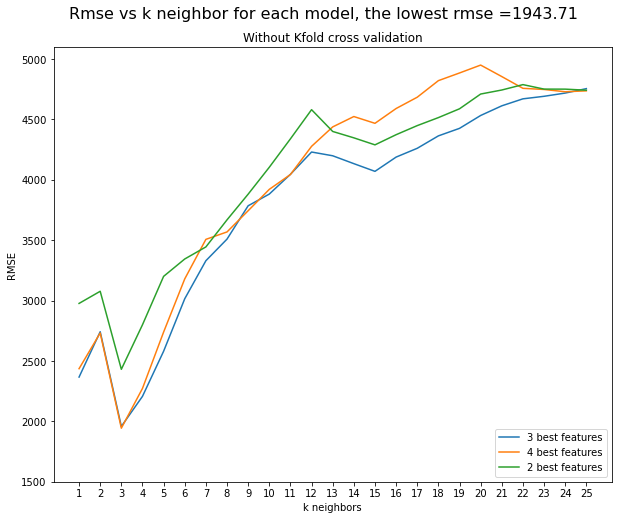

In [27]:
# Plot the results
plot_k_graph(rmse_results_multi, Multivar=True) 

Wow! The rmse score in the best univariate model is better than in the best multivariate one. This is desinetely a surprising result. However, more reliable error evaluation can be reached using K fold cross validation.

## K fold cross validation

We will use 4 folds for K fold cross validation to have 25% of data for testing in each fold and be consistent with our original models.

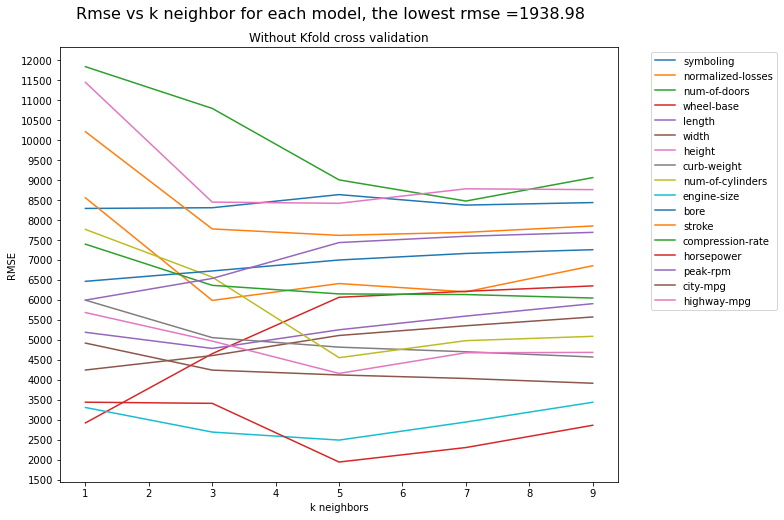

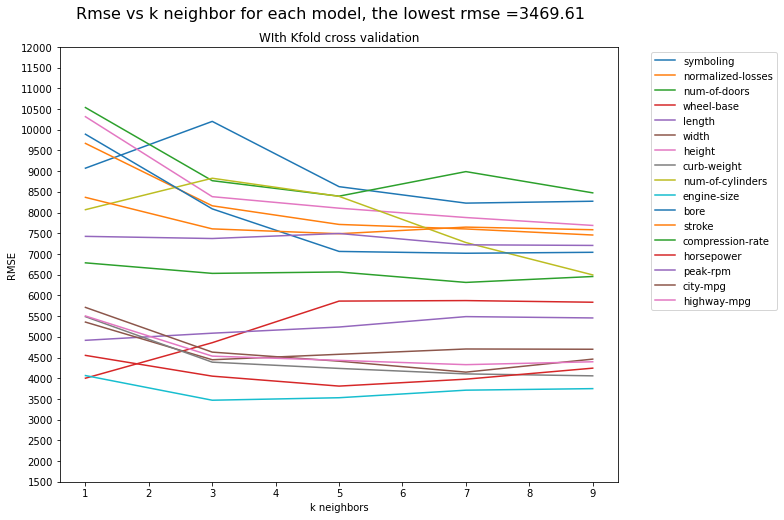

In [28]:
# Write a function to take different k values
from sklearn.model_selection import cross_val_score, KFold
def knn_train_test_k_kfold(training_col, target_col, df):
    # Create folds
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    
    k_values = [1, 3, 5, 7, 9]
    k_rmse = {}
    
    # Fir the model and predict the outcomes
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
        # Accuracy
        mses = cross_val_score(knn, df[[training_col]], df[target_col], scoring='neg_mean_squared_error', cv=kf)
        k_rmse[k] = np.mean(abs(mses) ** (1/2))
    return k_rmse

rmse_results_kfold = {}
for col in train_cols:
    rmse_val = knn_train_test_k_kfold(col, 'price', cars_numeric)
    rmse_results_kfold[col] = rmse_val

# Plot the results' comparison
plot_k_graph(rmse_results)
plot_k_graph(rmse_results_kfold, kfold=True)  

We can clearly see that with Kfold cross validation the error is much bigger. This is due to the fact that in the first case we used only one fold that turned out to be too optimistic and underestimated the rmse error.

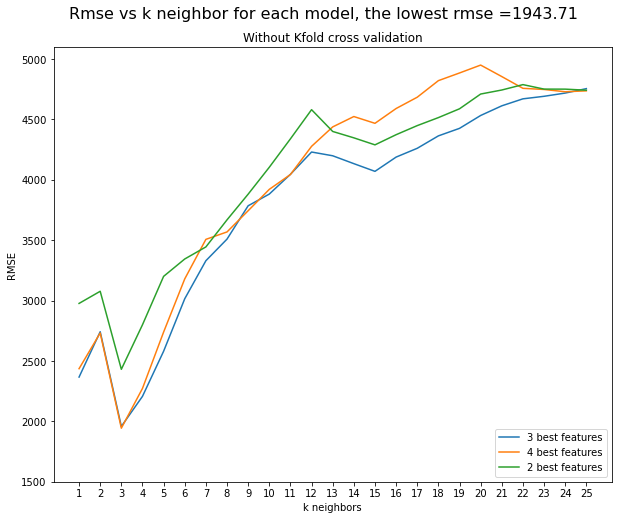

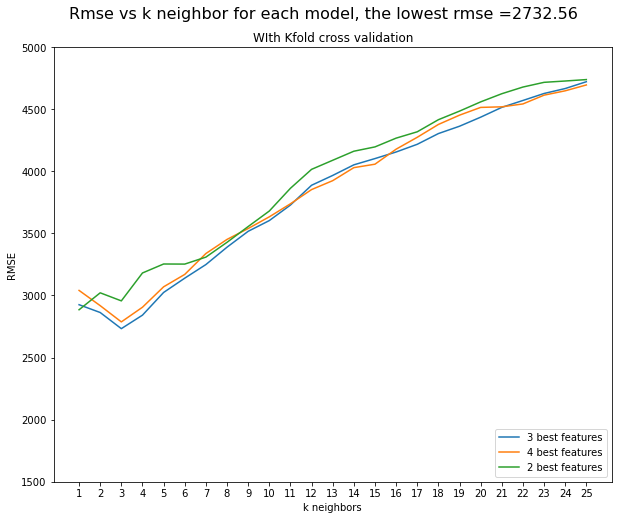

In [29]:
# Write a function for various k for multivariate model
def knn_train_test_multi_k_kfold(training_col, target_col, df):
    # Create folds
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    
    k_values = np.arange(1, 26)
    k_rmse = {}
    
    # Fir the model and predict the outcomes
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
        # Accuracy
        mses = cross_val_score(knn, df[training_col], df[target_col], scoring='neg_mean_squared_error', cv=kf)
        k_rmse[k] = np.mean(abs(mses) ** (1/2))
    return k_rmse

rmse_results_multi_kfold = {}
for n_cols in top_three_models.index:
    rmse_val = knn_train_test_multi_k_kfold(rmses.sort_values().index[:n_cols], 'price', cars_numeric)
    rmse_results_multi_kfold[n_cols] = rmse_val

# Plot the results' comparison
plot_k_graph(rmse_results_multi, Multivar=True)
plot_k_graph(rmse_results_multi_kfold, Multivar=True, kfold=True)

## Conclusions

We trained the k-nearest neighbor regressor to predict car's price based on the available data. After several iterations following conclusions have been reached:

Without using Kfold cross validation:
* Depending on number of k-neighbors `engine size` and `horse power` are two best features.
* The multivariate models **with 3 and 4 best features** were the most accurate.
* The number of **k-neighbors equal to 3** showed the best accuracy for multivariate model during the hyperparameter tuning.
* The univariate model **using `horsepower` column and k=5** showed the best rmse score overall (1938).

However, the conclusions have changed after applying Kfold cross validation:
* The multivariate models **with 3 and 4 best features** were also the most accurate.
* The number of **k-neighbors equal to 3** showed the best accuracy for multivariate model during the hyperparameter tuning and the **rmse score is higher (the error is bigger)** using Kfold cross validation (2732 vs 1943).
* The univariate model **using `engine size` column and k=3** showed the best rmse score overall among other univariate models. However the error is much bigger than in optimal multivariate model (3469 vs 2732).